[5.61564094]


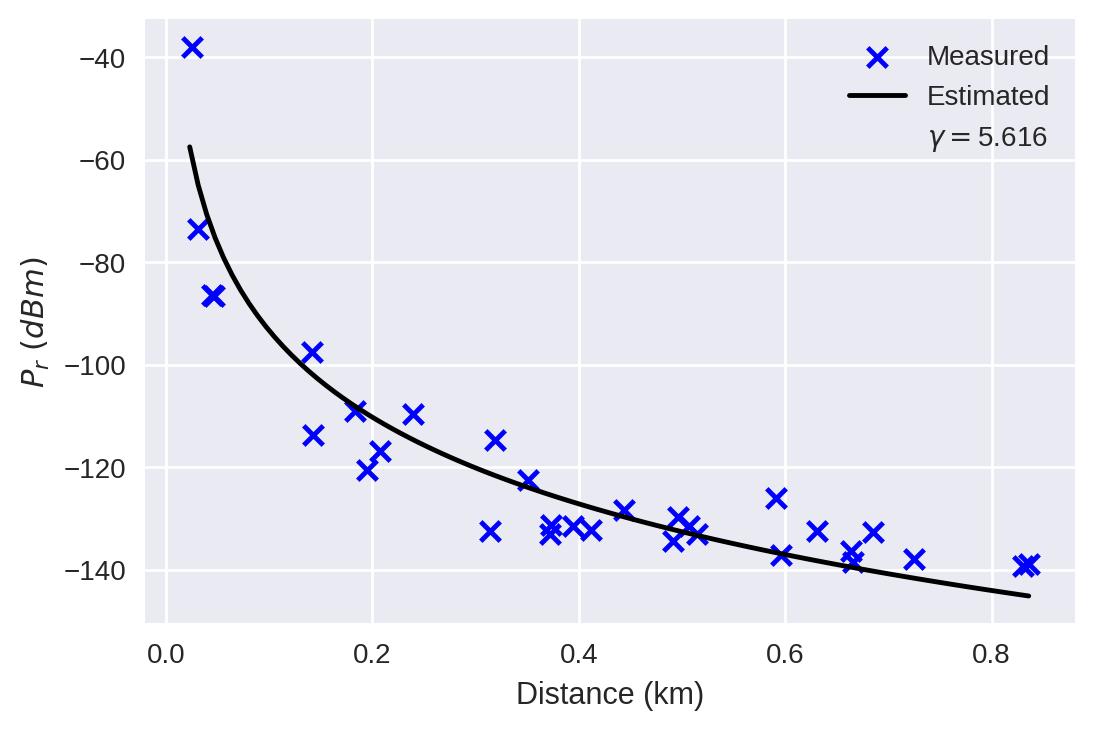

In [140]:
%matplotlib inline
'''
    Plot per spreadfactor samples on a map based on RSSI Value
'''
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from numpy import ma
from numpy import genfromtxt
from scipy.interpolate import griddata

from matplotlib import ticker, cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

from matplotlib.patches import Rectangle



''' Suppress scientific notation'''
np.set_printoptions(suppress=True)

''' Radius of the earth '''
R = 6373.0

# Height of transmit and receive antenna
ht = 1
hr = 22


def func(x,a):
    return (-(10*a*np.log10(1000*x))+19)
#     return 19 + 20*np.log10((ht)*(hr)) - 10*a*np.log10(1000*x)




def getDistance(lat1, lon1, lat2, lon2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlat = lat1-lat2
    dlon = lon1-lon2
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

def getData(datafile):
    ''' Load data from csv file '''
    dat = genfromtxt(datafile, delimiter=",")
    pts = []
    for d in dat:
        if d[4]<0:
            d[3] = d[3]+d[4]
        dist = np.sqrt(getDistance(gatewayLocation[0], gatewayLocation[1], d[0], d[1])**2 + ((ht-hr)/1000)**2)
        pts.append([abs(dist),d[3]])
    pts = np.array(pts)
    pts = pts[np.lexsort(np.fliplr(pts).T)]
    return pts



''' Measurement parameters'''
gatewayLocation = (13.013931, 77.570290)

fig = plt.figure(num=None, dpi=200, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
x = np.linspace(0.023,0.836,100)
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

for sf in range(12,13):
    datafile = "./datasets/SFBased/"+str(sf)+".csv"
    pts = getData(datafile)
    
    popt, pcov = curve_fit(func,pts[:,0], pts[:,1])
    print(popt)
    pt = ax.scatter(pts[:,0],pts[:,1], marker="x",c="b")
    curve, = ax.plot(x,func(x,popt),c="k")
    ax.set_xlabel('Distance (km)')
    ax.set_ylabel('$P_r \ (dBm)$')
    plt.legend((pt, curve,extra),("Measured", "Estimated", "$\gamma = $"+str(round(popt[0],3))),numpoints=1, loc=1, facecolor='white' )
    #plt.annotate("Yada",(0.7,0.8),xycoords="axes fraction")


    
    